In [2]:
import pandas as pd
import numpy as np
import jieba
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [4]:
tagged = pd.read_csv("to22/finaltag.csv",encoding='utf-8')
tagged['class'] = tagged['answer'].apply(lambda x:int(str(x)[0]))
tagged['label'] = tagged['answer'].apply(lambda x:0 if x==701 else 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(tagged['class'])
tagged['class'] = le.transform(tagged['class'])

tagged['sent_len'] = tagged['text'].apply(lambda x: len(str(x)))
print(len(tagged))
print(len(set(tagged['textid'])))
tagged.head()

91639
19227


textid  sentid          text  answer  label  class  sent_len
0       1       0  开始说借后面没就没上线了     501      1      4        12
1       1       1      现在话都不回一个     501      1      4         8
2       1       2             唉     701      0      6         1
3       2       0    他诈骗说能开通备用金     104      1      0        10
4       2       1  你们可以去看一下好多诈骗     701      0      6        12

In [5]:
postag = tagged[tagged.label==1]
negtag = tagged[tagged.label==0]
tag1 = tagged[tagged['class']==0]
tag2 = tagged[tagged['class']==1]
tag3 = tagged[tagged['class']==2]
tag4 = tagged[tagged['class']==3]
tag5 = tagged[tagged['class']==4]
tag6 = tagged[tagged['class']==5]
tag7 = tagged[tagged['class']==6]

In [15]:
tag7['sent_len'].describe()

count    39684.000000
mean         8.357802
std          5.194114
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        245.000000
Name: sent_len, dtype: float64

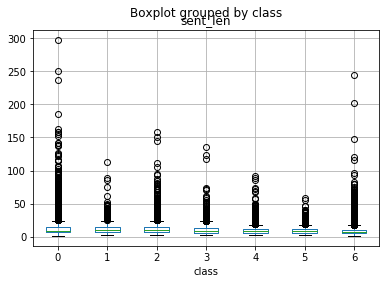

In [7]:
tagged.boxplot(column='sent_len',by='class') 

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


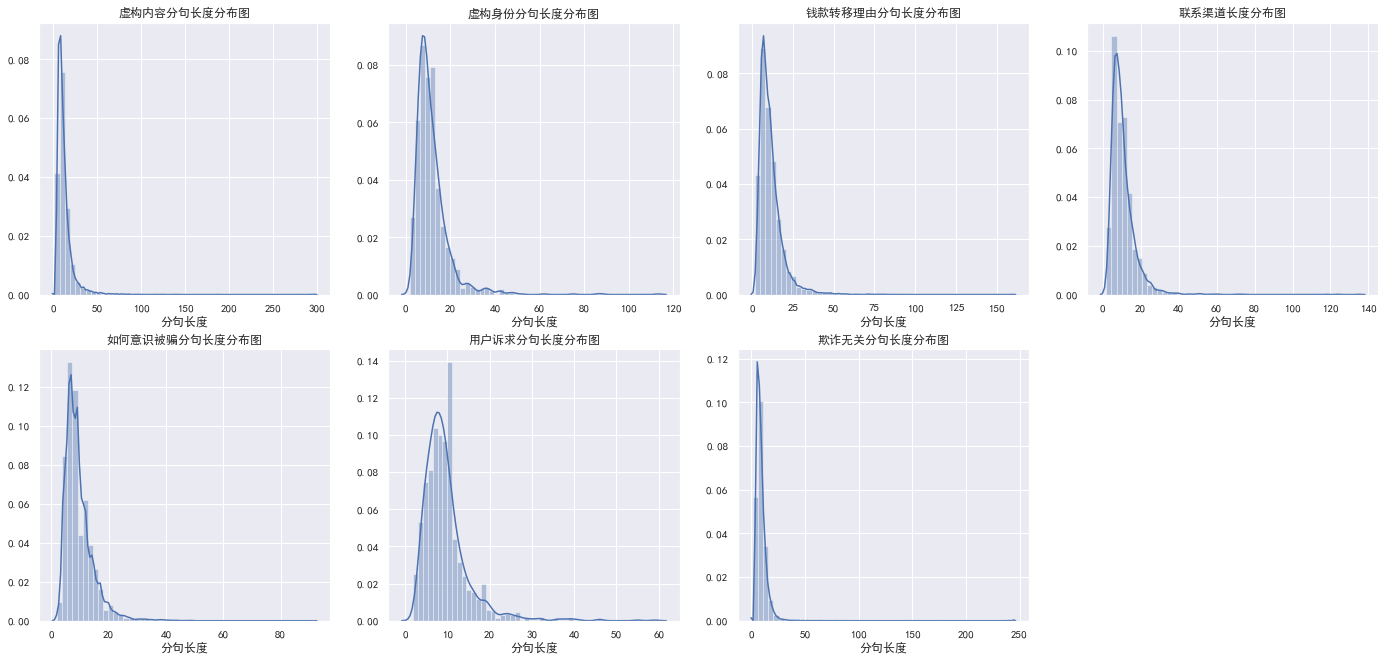

In [8]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

plt.figure(figsize=(24, 11))
#绘制第一幅图
plt.subplot(2,4,1)
sns.distplot(list(tag1['sent_len']))
plt.xlabel("分句长度")
plt.title("虚构内容分句长度分布图")

#绘制第二幅图
plt.subplot(2,4,2)
sns.distplot(list(tag2['sent_len']))
plt.xlabel("分句长度")
plt.title("虚构身份分句长度分布图")

#绘制第三幅图
plt.subplot(2,4,3)
sns.distplot(list(tag3['sent_len']))
plt.xlabel("分句长度")
plt.title("钱款转移理由分句长度分布图")

plt.subplot(2,4,4)
sns.distplot(list(tag4['sent_len']))
plt.xlabel("分句长度")
plt.title("联系渠道长度分布图")

plt.subplot(2,4,5)
sns.distplot(list(tag5['sent_len']))
plt.xlabel("分句长度")
plt.title("如何意识被骗分句长度分布图")


plt.subplot(246)
sns.distplot(list(tag6['sent_len']))
plt.xlabel("分句长度")
plt.title("用户诉求分句长度分布图")

plt.subplot(247)
sns.distplot(list(tag7['sent_len']))
plt.xlabel("分句长度")
plt.title("欺诈无关分句长度分布图")


plt.savefig('sentslen.jpg', dpi=200, bbox_inches='tight')
plt.show()

In [18]:
postag['sent_len'].describe()

count    31582.000000
mean        10.890127
std          7.974923
min          2.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        298.000000
Name: sent_len, dtype: float64

In [17]:
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords
stopwords = stopwordslist("stopwords.txt")

In [18]:
def is_Chinese(word):
    for ch in word:
        if '\u4e00' <= ch <= '\u9fff':
            return True
    return False

In [19]:
jieba.load_userdict('fraud.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\nlla\AppData\Local\Temp\jieba.cache
Loading model cost 1.460 seconds.
Prefix dict has been built succesfully.


In [30]:
total_text = ''
for text in tag7['text']:
        total_text += "," + str(text)
cuts=jieba.lcut(total_text)
words={}

for cut in cuts:
    if not is_Chinese(cut):
        continue
    elif cut in words:
        words[cut]=words[cut]+1
    else:
        words[cut]=1

sortedWords = sorted(words.items(), key=lambda d: d[1], reverse=True)

wordsTop10 = {}
wordframe = pd.DataFrame()
wordstop = []
wordscount = []
i=0
for key,value in sortedWords:
    if key in stopwords or len(key)<2:
        continue
    wordsTop10[key] = str(value)
    wordstop.append(key)
    wordscount.append(value)
    i+=1
    if i==10:
        break
print(wordsTop10)
wordframe['word'] = wordstop
wordframe['count'] = wordscount
wordframe

{'支付宝': '318', '付款': '288', '二维码': '234', '支付': '207', '花呗': '206', '退款': '151', '链接': '129', '截图': '114', '骗子': '104', '淘宝': '87'}


word  count
0  支付宝    318
1   付款    288
2  二维码    234
3   支付    207
4   花呗    206
5   退款    151
6   链接    129
7   截图    114
8   骗子    104
9   淘宝     87

In [7]:
tagged['text'] = 
for text in tagged['text']:
    cuts=jieba.lcut(text)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
count_vect = CountVectorizer()  
X_train_counts = count_vect.fit_transform(cuts)

<63642x4453 sparse matrix of type '<class 'numpy.int64'>'
	with 28320 stored elements in Compressed Sparse Row format>

In [11]:
tfidf_transformer = TfidfTransformer()  
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)  
X_ch2 = SelectKBest(chi2, k=10)  
X_train_ch2 = X_ch2.fit_transform(X_train_counts, Y_train)
X_ch2.get_support(indices=True).tolist() 

NameError: name 'Y_train' is not defined

In [ ]:
# -*- coding: utf-8 -*-
import cPickle as pickle
import numpy as np
import pandas as pd
import nltk
path = ''

def getvec():
    # from jieba import analyse
    data_a = pd.read_csv(open('dblp_Aconfs_acl.csv', 'r'))
    data_a = data_a[data_a.year>=2015]
    titles_a = list(data_a['title'])
    data_c = pd.read_csv(open('dblp_Aconfs_cvpr.csv', 'r'))
    data_c = data_c[data_c.year>=2015]
    titles_c = list(data_c['title'])
    words = []
    print len(titles_c), len(titles_a)
    for line in titles_a:
        line=line.lower()
        words.extend(nltk.word_tokenize(line))
    for line in titles_c:
        line = line.lower()
        words.extend(nltk.word_tokenize(line))
    words = list(set(words))
    pickle.dump(words, open('words.pkl','w'))
    wordid = {}
    rolevectores = []
    for w in words:
        wordid[w] = len(wordid)
    for text in titles_a:
        text = text.lower()
        rolevec = np.zeros(len(words) + 1)
        for w in nltk.word_tokenize(text):
            if w in words:
                rolevec[wordid[w]] += 1
        rolevec[-1] = 0
        rolevectores.append(rolevec)
    for text in titles_c:
        text = text.lower()
        rolevec = np.zeros(len(words) + 1)
        for w in nltk.word_tokenize(text):
            if w in words:
                rolevec[wordid[w]] += 1
        rolevec[-1] = 1
        rolevectores.append(rolevec)

    pickle.dump(np.array(rolevectores), open(path + 'tfidf-rolevector.pkl', 'wb'))
    return np.array(rolevectores)


def calc_ent(x):
    """
        calculate shanno ent of x
    """
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp
    return ent


def calc_condition_ent(x, y):
    """
        calculate ent H(y|x)
    """

    # calc ent(y|x)
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        sub_y = y[x == x_value]
        temp_ent = calc_ent(sub_y)
        ent += (float(sub_y.shape[0]) / y.shape[0]) * temp_ent
    return ent


def IG_word():
    words = pickle.load(open(path + 'words.pkl', 'rb'))
    wordid = {}
    idword = {}
    for w in words:
        idword[len(wordid)] = w
        wordid[w] = len(wordid)
    role = pickle.load(open(path + 'tfidf-rolevector.pkl', 'rb'))
    role = role.T
    label = role[-1]
    enty = calc_ent(label)
    IG = {}
    for i in range(len(role) - 1):
        fea = role[i]
        entcon = calc_condition_ent(fea, label)
        IG[i] = enty - entcon

    IG = sorted(IG.items(), key=lambda d: d[1], reverse=False)[:300]
    IGW = []
    for ig in IG:
        print idword[ig[0]]
        IGW.append((idword[ig[0]], ig[1]))
    pickle.dump(IGW, open(path + 'igwords.pkl', 'wb'))


getvec()
IG_word()